In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Exercício 1

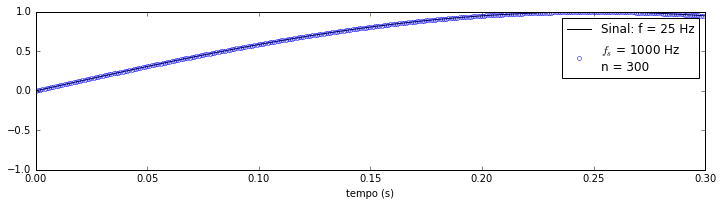

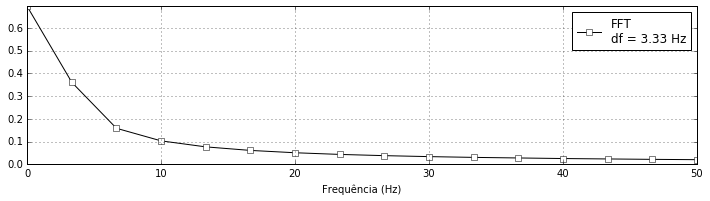

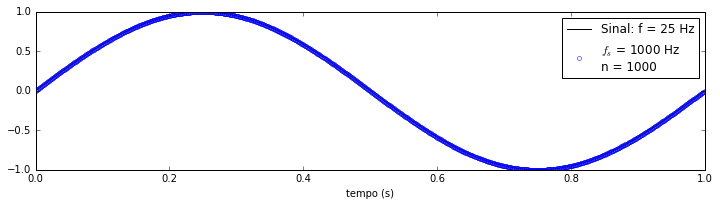

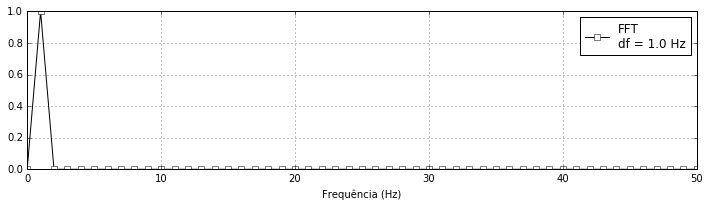

In [61]:
# Seno puro
fs = [(1000,300), (1000,1000)]#, (1000,2000), (2000,2000)]
      #(3,1000), (3,2000), (0.3,1000),(0.3,2000)]
for i,k in fs:
    ll = r'$f_s$ = ' + str(i) + ' Hz\nn = ' + str(k)
    tt = np.arange(0,k/i,1/i)
    yy = np.sin(2*np.pi*(tt+np.random.rand(1)/i))
    t = np.linspace(0,k/i,1e6*k/i)
    y = np.sin(2*np.pi*t)
    Y = np.fft.fft(yy)
    Y = 2 * Y/len(Y)
    Y[0] = Y[0]/2
    freq = np.fft.fftfreq(len(Y),d=1/i)
    df = freq[1]-freq[0]
    ss = 'FFT\ndf = ' + str(round(df,2)) + ' Hz'
    
    plt.figure(figsize=(12,4/np.sqrt(2)))
    plt.plot(t,y,'k',label='Sinal: f = 25 Hz')
    plt.xlabel('tempo (s)')
    plt.plot(tt,yy,'bo',mec='b',mfc='None',label=ll,ms=4)
    plt.axis([0,k/i,-1,1])
    plt.legend(numpoints=1,loc='best')
    
    plt.figure(figsize=(12,4/np.sqrt(2)))
    plt.plot(freq[0:int(len(Y)/2)],np.abs(Y[0:int(len(Y)/2)]),
             'ks-',mec='k',mfc="w",label=ss)
    plt.xlabel('Frequência (Hz)')
    plt.axis([0,50,0,max(abs(Y))])
    plt.legend(numpoints=1)
    plt.grid('on')

## Exercício 3

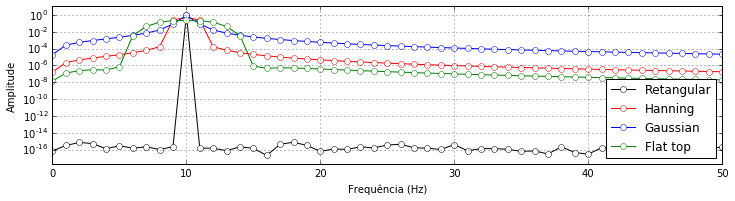

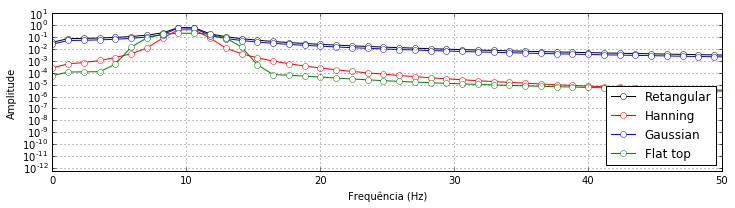

In [29]:
fs = [(1000,1000),(1000,850)]
for i,k in fs:
    ll = r'$f_s$ = ' + str(i) + ' Hz\nn = ' + str(k)
    tt = np.arange(0,k/i,1/i)
    yy = np.sin(2*np.pi*10*tt)
    t = np.linspace(0,k/i,1e6*k/i)
    y = np.sin(2*np.pi*10*t)
    # retangular
    Y = np.fft.fft(yy)
    Y = 2 * Y / len(Y)
    Y[0] = Y[0] / 2
    # hanning
    h = signal.hanning(len(yy))
    Y_h = 2 * np.fft.fft(yy*h)/len(Y)
    Y_h[0] = Y_h[0] / 2
    # gaussiana
    g = signal.gaussian(len(yy),std=500)
    Y_g = 2 * np.fft.fft(yy*g)/len(Y)
    Y_g[0] = Y_g[0] / 2
    # flat top
    ft = signal.flattop(len(yy))
    Y_f = 2 * np.fft.fft(yy*ft)/len(Y)
    Y_f[0] = Y_f[0] / 2
    # frequências
    freq = np.fft.fftfreq(len(Y),d=1/i)
    
    # figuras
    plt.figure(figsize=(12,4/np.sqrt(2)))
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y[0:int(len(Y)/2)]),
                 'ko-',mfc="w",mec='k',label='Retangular')
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y_h[0:int(len(Y)/2)]),
                     'ro-',mfc="w",mec='r',label='Hanning')
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y_g[0:int(len(Y)/2)]),
                 'bo-',mfc="w",mec='b',label='Gaussian')
    plt.semilogy(freq[0:int(len(Y)/2)],np.abs(Y_f[0:int(len(Y)/2)]),
                 'go-',mfc="w",mec='g',label='Flat top')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Amplitude')
    plt.axis([0,50,min(min(abs(Y)),min(abs(Y_h))),1e1])
    plt.legend(numpoints=1,loc='lower right')
    plt.grid('on')

## Exercício 4

[0, 4, 17, 27]

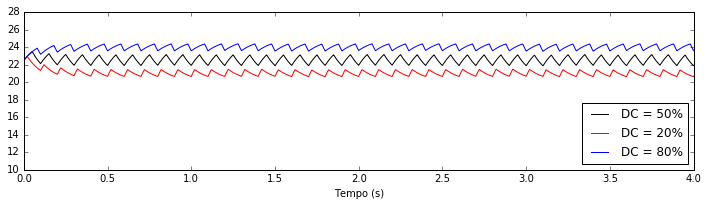

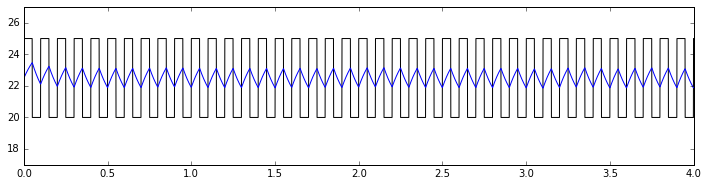

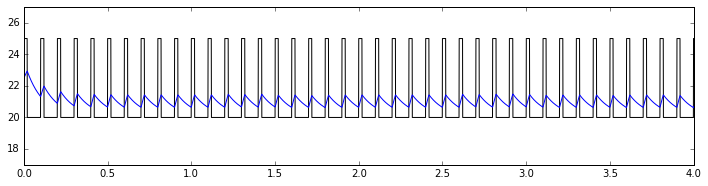

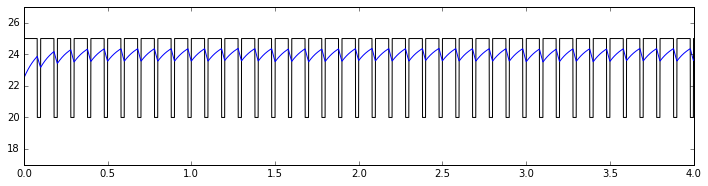

In [18]:
t = np.arange(0,10,0.001)
tau = 100e-3
tf = signal.TransferFunction([1],[tau,1])
u1 = 2.5 * signal.square(2*np.pi*10*t/1,duty=0.5) + 22.5
resp1 = signal.lsim2(tf,U=u1,T=t,X0=2.25)
u2 = 2.5 * signal.square(2*np.pi*10*t/1,duty=0.2) + 22.5
resp2 = signal.lsim2(tf,U=u2,T=t,X0=2.25)
u3 = 2.5 * signal.square(2*np.pi*10*t/1,duty=0.8) + 22.5
resp3 = signal.lsim2(tf,U=u3,T=t,X0=2.25)

plt.figure(figsize = (12,4/np.sqrt(2)))
plt.plot(resp1[0],resp1[1],'k',label='DC = 50%')
plt.plot(resp2[0],resp2[1],'r',label='DC = 20%')
plt.plot(resp3[0],resp3[1],'b',label='DC = 80%')
plt.plot([0,100],[5,5],'k--')
plt.plot([0,100],[-5,-5],'k--')
plt.plot([0,100],[4.5,4.5],'r--')
plt.plot([0,100],[-4.5,-4.5],'r--')
plt.axis([0,4,10,28])
plt.xlabel('Tempo (s)')
plt.legend(loc='lower right')

plt.figure(figsize = (12,4/np.sqrt(2)))
plt.plot(t,u1,'k')
plt.plot(resp1[0],resp1[1])
plt.axis([0,4,17,27])

plt.figure(figsize = (12,4/np.sqrt(2)))
plt.plot(t,u2,'k')
plt.plot(resp2[0],resp2[1])
plt.axis([0,4,17,27])

plt.figure(figsize = (12,4/np.sqrt(2)))
plt.plot(t,u3,'k')
plt.plot(resp3[0],resp3[1])
plt.axis([0,4,17,27])

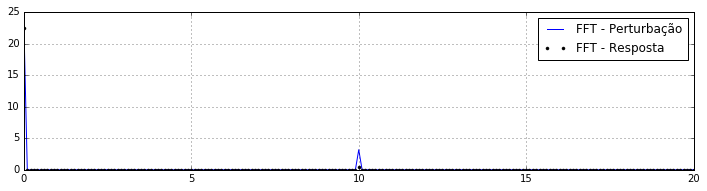

In [34]:
U1 = np.fft.fft(u1)
U1 = 2 * U1 / len(U1)
U1[0] = U1[0] / 2
U2 = np.fft.fft(u2)
U2 = 2 * U2 / len(U2)
U2[0] = U2[0] / 2
U3 = np.fft.fft(u3)
U3 = 2 * U3 / len(U3)
U3[0] = U3[0] / 2
ufreq = np.fft.fftfreq(len(U1),d=0.001)
Resp1 = np.fft.fft(resp1[1])
Resp1 = 2 * Resp1 / len(Resp1)
Resp1[0] = Resp1[0] / 2

plt.figure(figsize = (12,4/np.sqrt(2)))
plt.plot(ufreq[0:int(len(U1)/2)],abs(U1[0:int(len(U1)/2)]),'-',label='FFT - Perturbação')
plt.plot(ufreq[0:int(len(U1)/2)],abs(Resp1[0:int(len(U1)/2)]),'k.', label='FFT - Resposta')
plt.axis([0,20,0,25])
plt.legend()
plt.grid('on')

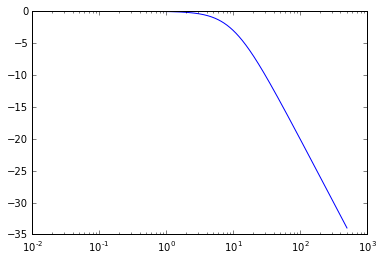

In [143]:
w,mag,phase = signal.bode(tf,np.linspace(0,500,1e4))
plt.semilogx(w,mag)

In [13]:
signal.lsim2?